In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

import neuro_morpho_toolbox as nmt
# ns=nmt.neuron_set('/Users/pengxie/Documents/Research/fullMorph_classification/data/registered_swc/Janelia_test/swc/Whole/')
ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')



/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 1.00
Loading CCF brain structure data...
Loading time: 0.00
Loading...
100 loaded: 2.9s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 2.0s
300 loaded: 2.4s
400 loaded: 2.4s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 2.2s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 2.2s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 2.2s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 2.5s
900 loaded: 1.8s
QC failed: AA0952.swc
QC failed: AA0964.swc
QC failed: AA0968.swc
QC

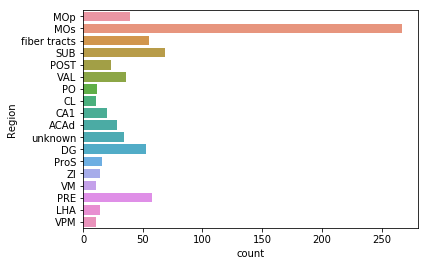

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

In [3]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)


## Pre-process the data
* result_hier      9100 x 7
* result_kmeans    7128 x 7
* result_dbscan    796  x 7
* result_hdbscan   3528  x 7

### The unique_* below is a dataframe containing the unique rows of the original trails, it also record number of cluster under that parameter

In [4]:

unique_hier = pd.read_excel('/home/penglab/Documents/dataSource/unique_hier.xlsx', index_col=0)
unique_kmeans = pd.read_excel('/home/penglab/Documents/dataSource/unique_kmeans.xlsx', index_col=0)
unique_dbscan = pd.read_excel('/home/penglab/Documents/dataSource/unique_dbscan.xlsx', index_col=0)
unique_hdbscan = pd.read_excel('/home/penglab/Documents/dataSource/unique_hdbscan.xlsx', index_col=0)



In [6]:
ns.UMAP

,0,1
AA0001,-6.362350,2.838826
AA0002,-5.314446,3.853981
AA0003,-6.417043,2.435804
AA0004,-6.437429,2.702971
AA0005,-4.839317,4.660816
AA0006,-5.423891,3.215793
AA0007,-6.502759,2.539598
AA0008,-6.491099,2.586632
AA0009,-6.391020,2.308730
AA0010,-5.398894,2.588701


#### add SNN

In [5]:
result_snn= pd.DataFrame(columns =['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index',
       'Adjusted Mutual Information', 'Silhouette Coefficient', 'parameter',
       'Cluster Num'],index=['snn0'])
_ = ns. get_clusters(method='SNN_community',
                     karg_dict={'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
h = metrics.homogeneity_score(ns.metadata['CellType'],ns.metadata['Cluster'])
c = metrics.completeness_score(ns.metadata['CellType'],ns.metadata['Cluster'])
V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
if len(typeR)<2:
    SS = 'below'
elif len(typeR)>=ns.UMAP.shape[0]:
    SS = 'above'
else:
    SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
result_snn.loc['snn0','Homogeneity']= h
result_snn.loc['snn0','Completeness']= c
result_snn.loc['snn0','V-measure']=V
result_snn.loc['snn0','Adjusted Rand Index']=ARI
result_snn.loc['snn0','Adjusted Mutual Information']=AMI
result_snn.loc['snn0','Silhouette Coefficient']=SS
result_snn.loc['snn0','parameter']=str({'knn':5,
                                'metric':'minkowski',
                                'method':'FastGreedy'})
result_snn.loc['snn0','Cluster Num']=len(typeR)
unique_snn = result_snn.copy()
unique_snn

Result of SNN_community


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



,Homogeneity,Completeness,V-measure,Adjusted Rand Index,Adjusted Mutual Information,Silhouette Coefficient,parameter,Cluster Num
snn0,0.537492,0.573445,0.554887,0.229847,0.423529,0.497742,"{'knn': 5, 'metric': 'minkowski', 'method': 'F...",28


### Show the box plot for different clustering method

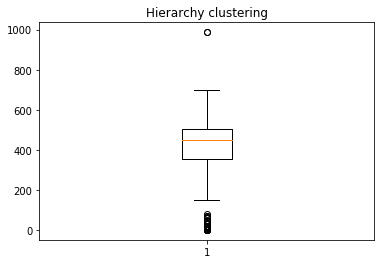

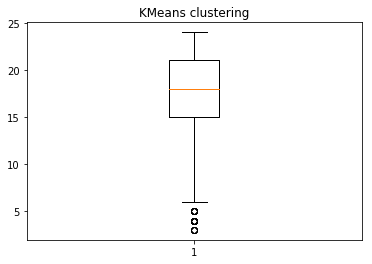

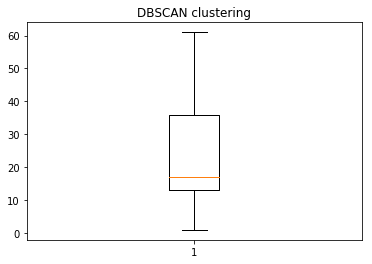

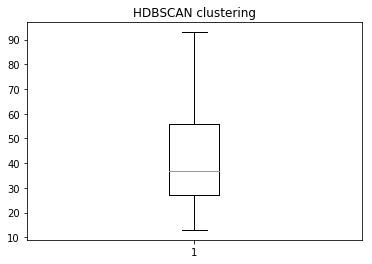

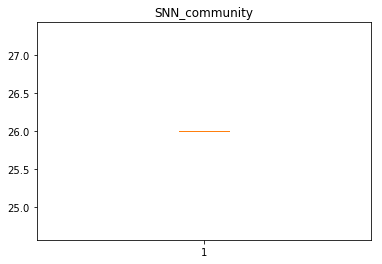

In [6]:
from IPython.display import display
pd.set_option('max_colwidth',300)
def boxCLUSTER(unique_df,cluster_method):
    fig1, ax1 = plt.subplots()
    ax1.set_title(cluster_method)
    ax1.boxplot(unique_df['Cluster Num'])    
boxCLUSTER(unique_hier,'Hierarchy clustering')
boxCLUSTER(unique_kmeans,'KMeans clustering')
boxCLUSTER(unique_dbscan,'DBSCAN clustering')
boxCLUSTER(unique_hdbscan,'HDBSCAN clustering')
boxCLUSTER(unique_snn,'SNN_community')

#  Look into the soma intra-cluster and inter-cluster distance
### function soma_Distance(uniqueDF,cluster_method,swcDF,metric,kvalue)
* **uniqueDF** is the dataframe with unrepeated parameters
* **cluster_method** can be 'Hierarchy','Kmeans', 'DBSCAN','HDBSCAN','' 
* **swcDF** is the dataframe containing the coordinate of the soma
* **metric** can be 'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'
* **kvalue** can be string'all', it can also be a certain number. In that case, the inter-cluster distance will only count the k-nearest other-cluster soma.
* **flipF**: 
    * if 1, will flip all the soma to the same hemishphere
    
* **size_Z** the size of z axis of the brain
* **PERFORmetric**, a specific metric to maximize, can be 'Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient'

In [3]:
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
def soma_Distance(uniqueDF,cluster_method,swcDF,metric,kvalue,flipF,size_Z,PERFORmetric):
    somaDF = swcDF.copy()
    if flipF:
        flipZlist=[]
        for iterz in swcDF['z']:
            if iterz>0.5*size_Z:
                flipZlist.append(size_Z-iterz)
            else:
                flipZlist.append(iterz)
        del somaDF['z']
        somaDF['z'] = flipZlist
            
    df_pre = uniqueDF.copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='below'].copy()
    df_pre = df_pre[df_pre['Silhouette Coefficient']!='above'].copy()
    df_pre = df_pre[df_pre['Completeness']!=1].copy()
    
    if PERFORmetric in ['Homogeneity', 'Completeness', 'V-measure', 'Adjusted Rand Index','Adjusted Mutual Information','Silhouette Coefficient']:
        df_pre.sort_values(PERFORmetric,inplace=True,ascending=False)
        delist = df_pre.index[min(10,uniqueDF.shape[0]):]
        df_pre.drop(delist,inplace =True)
            


        
    index_ls = df_pre.index

    colname = ['V','ARI','AMI','SC','parameter','Cluster Num','label list','AVG_intra','AVG_inter']
    df = pd.DataFrame(columns = colname,index = index_ls)
    df['parameter'] = df_pre.loc[index_ls,'parameter']

    #under each parameter
    for iter_idx in df.index:
        _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df.loc[iter_idx]['parameter']))
        somaDF['cluster'] = ns.metadata['Cluster']
        
        V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        if cluster_method == 'HDBSCAN':
            delist=np.array([])
            for itertype in typeR:
                if itertype[1]=='-':
                    delist = np.append(delist,itertype)
                if itertype[1]=='0':
                    delist=np.append(delist,itertype)
            detailDF = pd.DataFrame(index = np.setdiff1d(typeR,delist),columns = ['Cluster Type','INTRAlist','INTERlist','AVG_intra','AVG_inter'])
            
            df.loc[iter_idx,'label list'] = ' '.join([str(i) for i in np.setdiff1d(typeR,delist)])  
        else:
            detailDF = pd.DataFrame(index = typeR,columns = ['Cluster Type','INTRAlist','INTERlist','AVG_intra','AVG_inter'])
            df.loc[iter_idx,'label list'] = ' '.join([str(i) for i in typeR])  
        detailDF.loc[:,'Cluster Type'] = detailDF.index
        if len(typeR)<2:
            SS = 'below'
        elif len(typeR)>=ns.UMAP.shape[0]:
            SS = 'above'
        else:
            SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
            #LABEL LIST CAN BE DETELETED LATER
        

        #UNDER EACH PARAMETER
        # for each cluster result
        for label_idx in typeR:
            intra_list = []
            inter_list = []

            swc_intra = somaDF[somaDF['cluster'] ==label_idx].iloc[:,:-1].copy()#DF
            print(swc_intra.columns)
            swc_inter = somaDF[somaDF['cluster'] !=label_idx].iloc[:,:-1].copy()#DF
            value_intra = swc_intra.values
            value_inter = swc_inter.values
            
            sum_intra = np.zeros((value_intra.shape[0]-1,1))
            for i in range(value_intra.shape[0]):
                #exchange the specific row, make it to be the first row
                cal_intra = value_intra
                if i != 0:
                    cal_intra[[0,i],:] = cal_intra[[i,0],:]
                temp_intra = pdist(cal_intra, metric).reshape((len(pdist(cal_intra, metric)),1))
                # for each sample in that cluster, record the avg intra cluster distance
                intra_list.append(np.sum(temp_intra[:(value_intra.shape[0]-1),:])/(value_intra.shape[0]-1))
            # If a certai cluster only has 1 element, then the intra distance is 'nan'
            detailDF.loc[label_idx,'INTRAlist'] = intra_list#' '.join([str(i) for i in intra_list])    
            detailDF.loc[label_idx,'AVG_intra'] = np.mean(np.array(detailDF.loc[label_idx,'INTRAlist']))
            if kvalue == 'all':
                #sum inter will be a column vector, each element stores the corresponding distance
                sum_inter = np.zeros((value_inter.shape[0],1))
                # for each sample in that cluster
                for i in range(value_intra.shape[0]):
                    cal_inter = np.row_stack((value_intra[i,:],value_inter))
                    temp_inter = pdist(cal_inter, metric).reshape((len(pdist(cal_inter, metric)),1))[:(value_inter.shape[0]),:]
                    #assert(sum_inter.shape == temp_inter.shape,"Inter cluster record does not equal to number of out-cluster samples")
                    sum_inter = sum_inter + temp_inter
                # for each sample in that cluster, record the avg intra cluster distance    
                sum_inter = sum_inter/value_intra.shape[0]
                #row list
                inter_list = sum_inter.tolist()   
            else:
                #sum inter will be a column vector, each element stores the corresponding distance
                sum_inter = np.zeros((min(value_inter.shape[0],kvalue),1))
                # for each sample in that cluster
                for i in range(value_intra.shape[0]):
                    cal_inter = np.row_stack((value_intra[i,:],value_inter))
                    temp_inter = pdist(cal_inter, metric).reshape((len(pdist(cal_inter, metric)),1))[:(min(value_inter.shape[0],kvalue)),:]
                    #assert(sum_inter.shape == temp_inter.shape,"Inter cluster record does not equal to number of out-cluster samples")
                    sum_inter = sum_inter + temp_inter
                # for each sample in that cluster, record the avg intra cluster distance    
                sum_inter = sum_inter/value_intra.shape[0]
                #row list
                inter_list = sum_inter.tolist()                   
            detailDF.loc[label_idx,'INTERlist'] = inter_list   
            #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
            detailDF.loc[label_idx,'AVG_inter'] = np.mean(np.array(detailDF.loc[label_idx,'INTERlist']))
            detailDF[detailDF .isnull()]=0

        df.loc[iter_idx,'AVG_intra'] = (detailDF['AVG_intra']).sum()/detailDF.shape[0]
        df.loc[iter_idx,'AVG_inter'] = (detailDF['AVG_inter']).sum()/detailDF.shape[0]
        df.loc[iter_idx,'V'] = V
        df.loc[iter_idx,'ARI'] = ARI
        df.loc[iter_idx,'AMI'] = AMI
        df.loc[iter_idx,'SC'] = SS
        typeR, typeC = np.unique(ns.metadata['Cluster'], return_counts = True)
        #print(hdbscan_dict)
        df.loc[iter_idx,'Cluster Num'] = detailDF.shape[0]        
    return df

### The following obtained the first 10 rows which maximizing ARI

#### Only count the nearst 400 inter-cluster soma

In [4]:
#soma_hier10flip = soma_Distance(unique_hier,'Hierarchy',ns.features['soma_features'].raw_data.copy(),'euclidean',400,1,11400.0,'Adjusted Rand Index')
#soma_hier10flip.to_excel('/home/penglab/Documents/dataSource/soma_hier10flip.xlsx')
soma_hier10flip=pd.read_excel('/home/penglab/Documents/dataSource/soma_hier10flip.xlsx', index_col=0)


NameError: name 'unique_hier' is not defined

In [10]:
#soma_kmeans10flip = soma_Distance(unique_kmeans,'Kmeans',ns.features['soma_features'].raw_data.copy(),
                               #'euclidean',400,1,11400.0,'Adjusted Rand Index')
#soma_kmeans10flip.to_excel('/home/penglab/Documents/dataSource/soma_kmeans10flip.xlsx')
soma_kmeans10flip=pd.read_excel('/home/penglab/Documents/dataSource/soma_kmeans10flip.xlsx', index_col=0)

In [11]:
#soma_dbscan10flip= soma_Distance(unique_dbscan,'DBSCAN',ns.features['soma_features'].raw_data.copy(),
                              #'euclidean',400,1,11400.0,'Adjusted Rand Index')
#soma_dbscan10flip.to_excel('/home/penglab/Documents/dataSource/soma_dbscan10flip.xlsx')
soma_dbscan10flip=pd.read_excel('/home/penglab/Documents/dataSource/soma_dbscan10flip.xlsx', index_col=0)

In [12]:
#soma_hdbscan10flip= soma_Distance(unique_hdbscan,'HDBSCAN',ns.features['soma_features'].raw_data.copy(),
                               #'euclidean',400,1,11400.0,'Adjusted Rand Index')
#soma_hdbscan10flip.to_excel('/home/penglab/Documents/dataSource/soma_hdbscan10flip.xlsx')
soma_hdbscan10flip=pd.read_excel('/home/penglab/Documents/dataSource/soma_hdbscan10flip.xlsx', index_col=0)

In [16]:
#soma_snn10flip= soma_Distance(unique_snn,'SNN_community',ns.features['soma_features'].raw_data.copy(),
                               #'euclidean',400,1,11400.0,'Adjusted Rand Index')
#soma_snn10flip.to_excel('/home/penglab/Documents/dataSource/soma_snn10flip.xlsx')
soma_snn10flip = pd.read_excel('/home/penglab/Documents/dataSource/soma_snn10flip.xlsx', index_col=0)

### Plot the relation of soma distance

In [17]:
def plotSOMAdistance(df,cluster_method):
    col_Vmeasure = df['V']
    col_Completeness = df['ARI']
    col_ARI = df['ARI']
    col_AMI = df['AMI']
    col_SC = df['SC']
    col_inter = df['AVG_inter']
    col_intra = df['AVG_intra']
    x_axix=range(1,df.shape[0]+1)

    plt.title('Value fluctuation for '+str(cluster_method)+' with '+str(df.shape[0])+' unique trials')
    plt.plot(x_axix, col_intra.tolist(), color='green', label='Intra Distance')
    plt.plot(x_axix, col_inter.tolist(), color='pink', label='Inter Distance')
    #plt.plot(x_axix, col_Vmeasure.tolist(),  color='skyblue', label='V-measure')
    #plt.plot(x_axix, col_ARI.tolist(), color='blue', label='Adjusted Rand Index')
    #plt.plot(x_axix, col_AMI.tolist(), color='magenta', label='Adjusted Mutual Information')
    #plt.plot(x_axix, col_SC.tolist(), color='brown', label='Silhouette Coefficient')
    plt.legend() # 显示图例
    #a=['','H', 'C', 'V', 'ARI', 'AMI', 'SC']
    #plt.xticks(arange(len(a)),a)
    plt.xlabel('Different Parameter Choices')
    plt.ylabel('metric')
    plt.show()

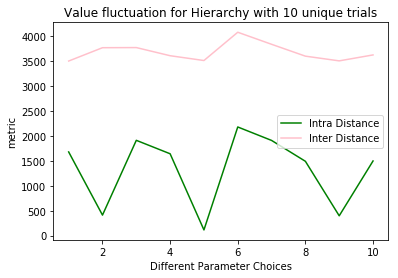

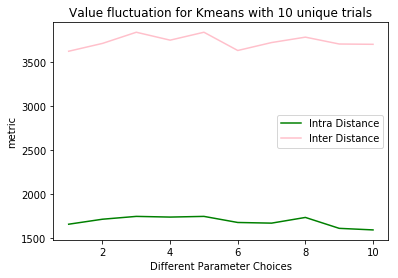

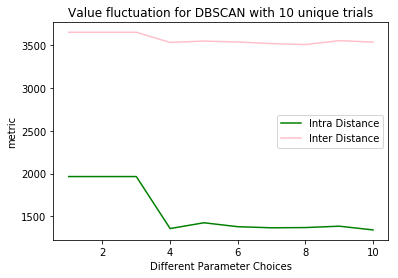

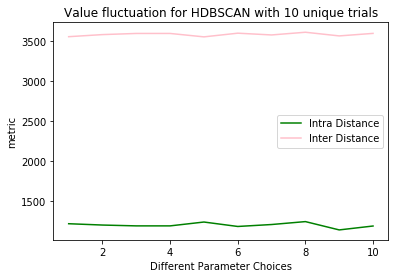

In [18]:
plotSOMAdistance(soma_hier10flip,'Hierarchy')
plotSOMAdistance(soma_kmeans10flip,'Kmeans')
plotSOMAdistance(soma_dbscan10flip,'DBSCAN')
plotSOMAdistance(soma_hdbscan10flip,'HDBSCAN')
#plotSOMAdistance(soma_snn10flip,'SNN_community')

In [19]:
def plotSOMAmetric(df,cluster_method):
    col_Vmeasure = df['V']
    col_Completeness = df['ARI']
    col_ARI = df['ARI']
    col_AMI = df['AMI']
    col_SC = df['SC']
    col_inter = df['AVG_inter']
    col_intra = df['AVG_intra']
    
    x_axix=range(1,df.shape[0]+1)

    plt.title('Value fluctuation for '+str(cluster_method)+' with '+str(df.shape[0])+' unique trials')
    plt.plot(x_axix, (col_intra/col_inter).tolist(), color='magenta', label='Intra to Inter Ratio')
    #plt.plot(x_axix, col_inter.tolist(), color='pink', label='Inter Distance')
    plt.plot(x_axix, col_Vmeasure.tolist(),  color='skyblue', label='V-measure')
    plt.plot(x_axix, col_ARI.tolist(), color='blue', label='Adjusted Rand Index')
    plt.plot(x_axix, col_AMI.tolist(), color='green', label='Adjusted Mutual Information')
    plt.plot(x_axix, col_SC.tolist(), color='brown', label='Silhouette Coefficient')
    plt.legend() # 显示图例
    a=['','ratio','H', 'C', 'V', 'ARI', 'AMI', 'SC']
    #plt.xticks(arange(len(a)),a)
    plt.xlabel('Different Parameter Choices')
    plt.ylabel('metric')
    plt.show()

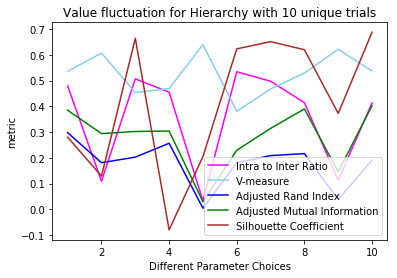

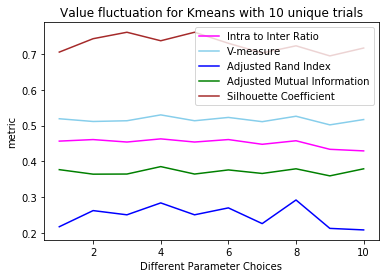

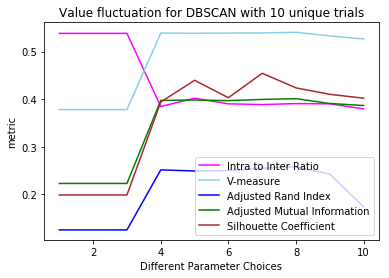

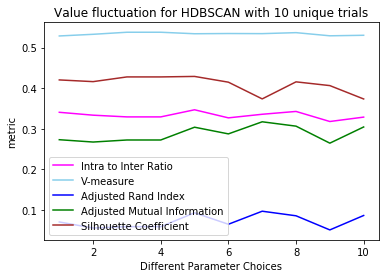

In [20]:
plotSOMAmetric(soma_hier10flip,'Hierarchy')
plotSOMAmetric(soma_kmeans10flip,'Kmeans')
plotSOMAmetric(soma_dbscan10flip,'DBSCAN')
plotSOMAmetric(soma_hdbscan10flip,'HDBSCAN')
#plotSOMAmetric(soma_snn10flip,'SNN_community')

### function Region_record(flipDF,cluster_method,somaDF,axonDF,pattern)
* **flipDF** is the dataframe obtained by flipping the brain region,here use the ['parameter'] column
* **cluster_method** can be 'Hierarchy','Kmeans', 'DBSCAN','HDBSCAN','' 
* **somaDF** is the dataframe containing the region of soma: ns.features['soma_features'].region
* **axonDF** is the dataframe containing the region of axon: ns.features['projection_features'].raw_data
* pattern:
        * If 'more', then calculate the information of multiple parameters
        * If 'one', then only calculate the parameter resulting in maximum 

In [21]:
def normalize(df, log=True):
    scaled_data = np.array(df) / np.sum(df, axis=0).values.reshape(-1,1) * 100000
    if log:
        scaled_data = np.log(scaled_data+100)
    scaled_dataDF = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_dataDF

In [50]:
import ast
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib as mpl
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
def Region_record(flipDF,cluster_method,somaDF,axonDF,pattern,normaF):
    somaregionDF = somaDF.copy()
    axonregionDF = axonDF.copy()      
    df_pre = flipDF.copy()
    df_pre = df_pre[df_pre['SC']!='below'].copy()
    df_pre = df_pre[df_pre['SC']!='above'].copy()
    df_pre.sort_values(by='ARI', ascending=False, inplace=True)
    if pattern == 'one':
        index_ls = df_pre.index[:1]
    else:
        index_ls = df_pre.index
    colname = ['V','ARI','AMI','SC','parameter','Cluster Num','soma Region List','axon Region List']
    df = pd.DataFrame(columns = colname,index = index_ls)
    df['parameter'] = df_pre.loc[index_ls,'parameter']
    
    #under each parameter
    for iter_idx in df.index:
        _ = ns. get_clusters(method = cluster_method,karg_dict = ast.literal_eval(df.loc[iter_idx]['parameter']))
        somaregionDF['cluster'] = ns.metadata['Cluster']
        axonregionDF['cluster'] = ns.metadata['Cluster']
        V = metrics.v_measure_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        ARI = metrics.adjusted_rand_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        AMI = metrics.adjusted_mutual_info_score(ns.metadata['CellType'],ns.metadata['Cluster'])
        typeR, typeC = np.unique(somaregionDF['cluster'] , return_counts = True)
        if cluster_method == 'HDBSCAN':
            delist=np.array([])
            for itertype in typeR:
                if itertype[1]=='-':
                    delist = np.append(delist,itertype)
                if itertype[1]=='0':
                    delist=np.append(delist,itertype)
            detailDF = pd.DataFrame(index = np.setdiff1d(typeR,delist),columns = ['swc list','soma region',
                                                                                  'max soma','total soma',
                                                                                  'max axon'])
        else:
            detailDF = pd.DataFrame(index = typeR,columns = ['swc list','soma region','max soma','total soma',
                                                             'max axon'])
        #detailDF.loc[:,'Cluster Type'] = detailDF.index
        if len(typeR)<2:
            SS = 'below'
        elif len(typeR)>=ns.UMAP.shape[0]:
            SS = 'above'
        else:
            SS = metrics.silhouette_score(ns.UMAP, ns.metadata['Cluster'], metric='sqeuclidean')
            #LABEL LIST CAN BE DETELETED LATER


        # for each cluster result UNDER EACH PARAMETER
        somaCLUSTERlist = []
        axonCLUSTERlist = []

        #axonCLUSTER = pd.DataFrame(index = axonregionDF.columns[:-1])
        for label_idx in detailDF.index:
            axonTEMPdf = pd.DataFrame(index = axonregionDF.columns[:-1])
            swcINlabel = somaregionDF[somaregionDF['cluster']==label_idx]
            detailDF.loc[label_idx,'swc list'] = (swcINlabel.index).tolist()
            #assert(len(inter_list)==somaDF[somaDF['cluster'] !=label_idx].shape[0])
            detailDF.loc[label_idx,'soma region'] = swcINlabel['Region'].tolist()
            del_soma_region=detailDF.loc[label_idx,'soma region']
            while 'unknown' in del_soma_region:
                del_soma_region.remove('unknown')
            while 'fiber tracts' in del_soma_region:
                del_soma_region.remove('fiber tracts')
            IDrange, IDcounts = np.unique(del_soma_region, return_counts = True)
            #sort the counting
            count_sort_ind = np.argsort(-IDcounts)
            dicitem = []
            for i in range(1,min(len(IDrange)+1,4)):
                dicitem.append(str(i)+'somaR')
            for i in range(1,min(len(IDrange)+1,4)):
                dicitem.append(str(i)+'somaC')
            #select the first three regions
            dicvalue = IDrange[count_sort_ind][0:min(3,len(IDrange))]
            dicvalue = np.append(dicvalue,IDcounts[count_sort_ind][0:min(3,len(IDrange))])
            detailDF.loc[label_idx,'max soma'] = str(dict(zip(dicitem, dicvalue)))
            somaCLUSTERlist.append(detailDF.loc[label_idx,'max soma'] )
            detailDF.loc[label_idx,'total soma'] = swcINlabel.shape[0]
            
            #axonLABEL stores all the rows under same cluster
            axonLABEL = axonregionDF[axonregionDF['cluster']==label_idx].copy()
            axonLABEL.drop('cluster', axis=1,inplace=True)
            axonTEMPdf[label_idx]=axonLABEL.sum()
            if normaF:
                #normalize the sum
                axonTEMPdf = normalize(axonTEMPdf , log=True)
            axonTEMPdf.sort_values(by=label_idx, ascending=False, inplace=True)
            dicitem = []
            for i in range(1,4):
                dicitem.append(str(i)+'axonR')
            for i in range(1,4):
                dicitem.append(str(i)+'axonC')
            dicvalue = axonTEMPdf.index[:3]
            dicvalue = np.append(dicvalue,axonTEMPdf.loc[:,label_idx][:3])
            detailDF.loc[label_idx,'max axon'] = str(dict(zip(dicitem, dicvalue)))
            axonCLUSTERlist.append(detailDF.loc[label_idx,'max axon'] )

        df.loc[iter_idx,'soma Region List'] = somaCLUSTERlist
        df.loc[iter_idx,'axon Region List'] = axonCLUSTERlist
        df.loc[iter_idx,'Cluster Num'] = detailDF.shape[0]
        df.loc[iter_idx,'V'] = V
        df.loc[iter_idx,'ARI'] = ARI
        df.loc[iter_idx,'AMI'] = AMI
        df.loc[iter_idx,'SC'] = SS
    if pattern == 'more':
        return df.sort_values(by='ARI', ascending=False)
    elif pattern == 'one':
        return detailDF

In [52]:
detailDF

NameError: name 'detailDF' is not defined

In [51]:
hier_as = Region_record(soma_hier10flip.copy(),'Hierarchy',ns.features['soma_features'].region,ns.features['projection_features'].raw_data,'one',1)
hier_as.to_excel('/home/penglab/Documents/dataSource/hier_as.xlsx')
hier_as = pd.read_excel('/home/penglab/Documents/dataSource/hier_as.xlsx', index_col=0)

kmeans_as = Region_record(soma_kmeans10flip.copy(),'Kmeans',ns.features['soma_features'].region,ns.features['projection_features'].raw_data,'one',1)
kmeans_as.to_excel('/home/penglab/Documents/dataSource/kmeans_as.xlsx')
kmeans_as = pd.read_excel('/home/penglab/Documents/dataSource/kmeans_as.xlsx', index_col=0)

dbscan_as = Region_record(soma_dbscan10flip.copy(),'DBSCAN',ns.features['soma_features'].region,ns.features['projection_features'].raw_data,'one',1)
dbscan_as.to_excel('/home/penglab/Documents/dataSource/dbscan_as.xlsx')
dbscan_as = pd.read_excel('/home/penglab/Documents/dataSource/dbscan_as.xlsx', index_col=0)

hdbscan_as = Region_record(soma_hdbscan10flip.copy(),'HDBSCAN',ns.features['soma_features'].region,ns.features['projection_features'].raw_data,'one',1)
hdbscan_as.to_excel('/home/penglab/Documents/dataSource/hdbscan_as.xlsx')
hdbscan_as = pd.read_excel('/home/penglab/Documents/dataSource/hdbscan_as.xlsx', index_col=0)

snn_as = Region_record(soma_hdbscan10flip.copy(),'SNN_community',ns.features['soma_features'].region,ns.features['projection_features'].raw_data,'one',1)
snn_as.to_excel('/home/penglab/Documents/dataSource/snn_as.xlsx')
snn_as = pd.read_excel('/home/penglab/Documents/dataSource/snn_as.xlsx', index_col=0)

/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Hierarchy CLustering


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of Kmeans


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of DBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



Result of HDBSCAN


/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Result of SNN_community


/home/penglab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning:

The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.



In [39]:
display(hier_as)

,swc list,soma region,max soma,total soma,max axon
C1,"['AA0001', 'AA0003', 'AA0006', 'AA0008', 'AA0010', 'AA0036', 'AA0037', 'AA0040', 'AA0044', 'AA0045', 'AA0047', 'AA0049', 'AA0050', 'AA0054', 'AA0074', 'AA0109', 'AA0112', 'AA0129', 'AA0137', 'AA0201', 'AA0224', 'AA0225', 'AA0235', 'AA0301', 'AA0316', 'AA0317', 'AA0323', 'AA0331', 'AA0334', 'AA03...","['SSp-m', 'MOp', 'MOp', 'SSp-ul', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOp', 'PCN', 'PO', 'PCN', 'MD', 'CM', 'MOs', 'MOs', 'VPMpc', 'VM', 'VPMpc', 'MOp', 'MOp', 'MOs', 'PCN', 'VAL', 'VPM', 'ORBl', 'VAL', 'CL', 'PCN', 'PCN', 'PO', 'PO', 'PO', 'VAL', 'VAL', 'VAL', 'PO', 'VAL', 'MD', 'PCN', 'VAL', '...","{'1somaR': 'VAL', '2somaR': 'MOp', '3somaR': 'MOs', '1somaC': '11', '2somaC': '7', '3somaC': '7'}",52,"{'1axonR': 'ipsi_MOs', '2axonR': 'ipsi_MOp', '3axonR': 'ipsi_SSp-m', '1axonC': 1317039.5226106248, '2axonC': 1265445.6689136657, '3axonC': 530134.8960585177}"
C10,"['AA0011', 'AA0012', 'AA0131', 'AA0132', 'AA0133', 'AA0134', 'AA0135', 'AA0169', 'AA0179', 'AA0180', 'AA0186', 'AA0187', 'AA0250', 'AA0415', 'AA0545', 'AA0548', 'AA0554', 'AA0577', 'AA0583', 'AA0584', 'AA0587', 'AA0596', 'AA0605', 'AA0617', 'AA0623', 'AA0625', 'AA0626', 'AA0628', 'AA0630', 'AA06...","['MOs', 'MOs', 'MOp', 'MOp', 'MOs', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOp', 'MOs', 'MOs', '...","{'1somaR': 'MOs', '2somaR': 'MOp', '3somaR': 'ACAd', '1somaC': '47', '2somaC': '11', '3somaC': '2'}",63,"{'1axonR': 'contra_MOs', '2axonR': 'contra_CP', '3axonR': 'contra_PO', '1axonC': 298690.9290246083, '2axonC': 284923.64500671864, '3axonC': 248251.14590865496}"
C11,"['AA0119', 'AA0121', 'AA0122', 'AA0181', 'AA0182', 'AA0183', 'AA0185', 'AA0188', 'AA0245', 'AA0261', 'AA0277', 'AA0278', 'AA0390', 'AA0394', 'AA0398', 'AA0406', 'AA0456', 'AA0457', 'AA0514', 'AA0544', 'AA0550', 'AA0599', 'AA0650', 'AA0726', 'AA0727', 'AA0732', 'AA0737', 'AA0766', 'AA0769', 'AA07...","['ORBl', 'ORBl', 'ORBl', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'fiber tracts', 'MOs', 'FRP', 'MOs', 'MOs', 'ORBvl', 'PL', 'PL', 'MRN', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ACAd', 'MOs', 'ACAd', 'ACAd', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ACAv', 'ACAd'...","{'1somaR': 'MOs', '2somaR': 'ACAd', '3somaR': 'ORBl', '1somaC': '31', '2somaC': '7', '3somaC': '3'}",50,"{'1axonR': 'contra_MD', '2axonR': 'contra_CP', '3axonR': 'contra_VM', '1axonC': 338333.03867246833, '2axonC': 231168.5413462364, '3axonC': 216477.67674270502}"
C12,"['AA0961', 'AA0962', 'AA0967', 'AA0969', 'AA0973', 'AA0974', 'AA0979', 'AA0981', 'AA0988', 'AA0989', 'AA0990', 'AA0991', 'AA0993']","['CENT', 'FL', 'COPY', 'CUL', 'AN', 'AN', 'PFL', 'COPY', 'CENT', 'SUV', 'PRM', 'PRM', 'AN']","{'1somaR': 'AN', '2somaR': 'CENT', '3somaR': 'COPY', '1somaC': '3', '2somaC': '2', '3somaC': '2'}",13,"{'1axonR': 'contra_IP', '2axonR': 'contra_fiber tracts', '3axonR': 'contra_PAG', '1axonC': 26440.558186526443, '2axonC': 20177.93659419465, '3axonC': 7590.840889007883}"
C13,"['AA0142', 'AA0752', 'AA0963', 'AA0975', 'AA0982']","['PVi', 'PIL', 'FL', 'PYR', 'FOTU']","{'1somaR': 'FL', '2somaR': 'FOTU', '3somaR': 'PIL', '1somaC': '1', '2somaC': '1', '3somaC': '1'}",5,"{'1axonR': 'contra_IC', '2axonR': 'contra_SCm', '3axonR': 'contra_MRN', '1axonC': 29540.83643961273, '2axonC': 23595.10857845035, '3axonC': 19311.918228544724}"
C14,"['AA0081', 'AA0178', 'AA0266', 'AA0273', 'AA0388', 'AA0399', 'AA0405', 'AA0430', 'AA0434', 'AA0504', 'AA0506', 'AA0507', 'AA0508', 'AA0510', 'AA0558', 'AA0610', 'AA0616', 'AA0753', 'AA0756', 'AA0757', 'AA0758', 'AA0779', 'AA0919', 'AA0924', 'AA0928', 'AA0929', 'AA0942', 'AA0947', 'AA0957', 'AA09...","['DMH', 'unknown', 'unknown', 'fiber tracts', 'VAL', 'VPL', 'RT', 'unknown', 'IRN', 'unknown', 'unknown', 'DR', 'GRN', 'PRNc', 'LHA', 'ZI', 'LHA', 'unknown', 'P

In [24]:
from IPython.display import display
pd.set_option('max_colwidth',300)
display(hier_as)


,swc list,soma region,max soma,total soma,max axon
C1,"['AA0020', 'AA0021', 'AA0022', 'AA0024', 'AA0026', 'AA0030', 'AA0031', 'AA0032', 'AA0033', 'AA0052', 'AA0071', 'AA0072', 'AA0079', 'AA0125', 'AA0126', 'AA0139', 'AA0157', 'AA0158', 'AA0168', 'AA0170', 'AA0171', 'AA0173', 'AA0194', 'AA0195', 'AA0199', 'AA0203', 'AA0227', 'AA0246', 'AA0248', 'AA02...","['SUB', 'POST', 'fiber tracts', 'POST', 'POST', 'POST', 'SUB', 'POST', 'POST', 'SUB', 'SUB', 'POST', 'SUB', 'POST', 'SUB', 'SUB', 'POST', 'POST', 'PRE', 'PRE', 'PRE', 'PRE', 'SUB', 'SUB', 'ProS', 'PRE', 'fiber tracts', 'PRE', 'ProS', 'SUB', 'PRE', 'PRE', 'PRE', 'ProS', 'PRE', 'fiber tracts', 'PR...","{'1somaR': 'PRE', '2somaR': 'SUB', '3somaR': 'POST', '1somaC': '52', '2somaC': '51', '3somaC': '22'}",159,"{'1axonR': 'contra_fiber tracts', '2axonR': 'contra_SUB', '3axonR': 'contra_ENTm', '1axonC': 5.990889359490777, '2axonC': 5.946726048629487, '3axonC': 5.886463115752954}"
C10,"['AA0051', 'AA0101', 'AA0226', 'AA0321', 'AA0342', 'AA0693', 'AA0904']","['CL', 'MOs', 'VM', 'VAL', 'VAL', 'VAL', 'ZI']","{'1somaR': 'VAL', '2somaR': 'CL', '3somaR': 'MOs', '1somaC': '3', '2somaC': '1', '3somaC': '1'}",7,"{'1axonR': 'ipsi_MOp', '2axonR': 'ipsi_MOs', '3axonR': 'ipsi_CP', '1axonC': 6.032450496576458, '2axonC': 6.006870016238463, '3axonC': 5.943288892004167}"
C11,"['AA0110', 'AA0330', 'AA0352', 'AA0448']","['MOs', 'ZI', 'PO', 'VM']","{'1somaR': 'MOs', '2somaR': 'PO', '3somaR': 'VM', '1somaC': '1', '2somaC': '1', '3somaC': '1'}",4,"{'1axonR': 'ipsi_MOs', '2axonR': 'ipsi_ACAd', '3axonR': 'ipsi_MOp', '1axonC': 6.112102286091369, '2axonC': 5.98687893750301, '3axonC': 5.975030260201314}"
C12,"['AA0055', 'AA0075', 'AA0083', 'AA0089', 'AA0094', 'AA0095', 'AA0097', 'AA0111', 'AA0113', 'AA0238', 'AA0239', 'AA0241', 'AA0294', 'AA0295', 'AA0298', 'AA0344', 'AA0354', 'AA0355', 'AA0356', 'AA0358', 'AA0363', 'AA0365', 'AA0367', 'AA0368', 'AA0369', 'AA0370', 'AA0371', 'AA0373', 'AA0391', 'AA05...","['MD', 'IAD', 'fiber tracts', 'PR', 'PR', 'MD', 'MOs', 'ACAd', 'ACAd', 'ACAd', 'ACAd', 'MOs', 'CL', 'LD', 'PCN', 'VAL', 'CL', 'VAL', 'CL', 'VAL', 'MD', 'VAL', 'CL', 'MD', 'CL', 'MD', 'MD', 'CL', 'VAL', 'PO', 'CL', 'VM']","{'1somaR': 'CL', '2somaR': 'MD', '3somaR': 'VAL', '1somaC': '7', '2somaC': '6', '3somaC': '5'}",32,"{'1axonR': 'ipsi_MOs', '2axonR': 'ipsi_ACAd', '3axonR': 'ipsi_CP', '1axonC': 5.997576030735356, '2axonC': 5.982336322735707, '3axonC': 5.973473177158367}"
C13,"['AA0015', 'AA0016', 'AA0018', 'AA0019', 'AA0029', 'AA0066', 'AA0067', 'AA0068', 'AA0069', 'AA0070', 'AA0073', 'AA0076', 'AA0088', 'AA0138', 'AA0208', 'AA0234', 'AA0292', 'AA0296', 'AA0336', 'AA0341', 'AA0357', 'AA0359', 'AA0453', 'AA0518', 'AA0520', 'AA0530', 'AA0539', 'AA0540', 'AA0604', 'AA06...","['AV', 'AV', 'fiber tracts', 'AV', 'fiber tracts', 'ACAd', 'ACAd', 'AV', 'IAD', 'AV', 'AD', 'AV', 'RE', 'RE', 'CA1', 'ACAd', 'DG', 'DG', 'LD', 'LP', 'LD', 'LP', 'LD', 'AV', 'LD', 'AV', 'LD', 'LD', 'PO', 'PO', 'AV']","{'1somaR': 'AV', '2somaR': 'LD', '3somaR': 'ACAd', '1somaC': '9', '2somaC': '6', '3somaC': '3'}",31,"{'1axonR': 'ipsi_RSPv', '2axonR': 'ipsi_fiber tracts', '3axonR': 'ipsi_CP', '1axonC': 6.055068163365417, '2axonC': 5.987816981810615, '3axonC': 5.889823813038595}"
C14,['AA0104'],['MOs'],"{'1somaR': 'MOs', '1somaC': '1'}",1,"{'1axonR': 'ipsi_MD', '2axonR': 'ipsi_VAL', '3axonR': 'ipsi_RT', '1axonC': 6.027073872694376, '2axonC': 5.996620840379812, '3axonC': 5.9434698899865905}"
C15,"['AA0002', 'AA0005', 'AA0013', 'AA0014', 'AA0034', 'AA0035', 'AA0042', 'AA0059', 'AA0060', 'AA0062', 'AA0063', 'AA0064', 'AA0065', 'AA0096', 'AA0098', 'AA0099', 'AA0100', 'AA0102', 'AA0106', 'AA0107', 'AA0108', 'AA0116', 'AA0117', 'AA0118', 'AA0120', 'AA0130', 'AA0140', 'AA0184', 'AA0190', 'AA02...","['MOp', 'MOp', 'MOs', 'MOs', 'MOp', 'MOp', 'MOp', 'ORBl', 'MOs', 'MOs', 'fiber tracts', 'MOs', 'MOs', 'MOs', 'ACAd', 'MOs', 'MOs', 'MOp', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'ORBl', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs',

In [26]:
display(kmeans_as)


,swc list,soma region,max soma,total soma,max axon
C0,"['AA0057', 'AA0058', 'AA0124', 'AA0125', 'AA0139', 'AA0158', 'AA0161', 'AA0244', 'AA0246', 'AA0247', 'AA0249', 'AA0252', 'AA0253', 'AA0259', 'AA0380', 'AA0383', 'AA0423', 'AA0459', 'AA0476', 'AA0477', 'AA0478', 'AA0499', 'AA0532', 'AA0538', 'AA0546', 'AA0551', 'AA0566', 'AA0569', 'AA0574', 'AA06...","['fiber tracts', 'CA1', 'ProS', 'POST', 'SUB', 'POST', 'SUB', 'PRE', 'PRE', 'ProS', 'PRE', 'SUB', 'fiber tracts', 'PRE', 'SUB', 'SUB', 'SUB', 'SUB', 'SUB', 'SUB', 'PRE', 'SUB', 'SUB', 'PRE', 'unknown', 'POST', 'fiber tracts', 'fiber tracts', 'fiber tracts', 'ProS', 'CA1', 'CA1', 'ProS', 'SUB', '...","{'1somaR': 'SUB', '2somaR': 'CA1', '3somaR': 'PRE', '1somaC': '25', '2somaC': '11', '3somaC': '7'}",59,"{'1axonR': 'contra_fiber tracts', '2axonR': 'contra_SUB', '3axonR': 'contra_CA1', '1axonC': 6.017171975070658, '2axonC': 5.961881817006009, '3axonC': 5.9238783370306045}"
C1,"['AA0001', 'AA0003', 'AA0004', 'AA0006', 'AA0007', 'AA0008', 'AA0009', 'AA0010', 'AA0015', 'AA0016', 'AA0018', 'AA0019', 'AA0023', 'AA0029', 'AA0036', 'AA0037', 'AA0038', 'AA0039', 'AA0040', 'AA0041', 'AA0043', 'AA0044', 'AA0045', 'AA0046', 'AA0047', 'AA0048', 'AA0049', 'AA0050', 'AA0051', 'AA00...","['SSp-m', 'MOp', 'MOp', 'MOp', 'SSp-ul', 'SSp-ul', 'MOp', 'MOs', 'AV', 'AV', 'fiber tracts', 'AV', 'AM', 'fiber tracts', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOp', 'MOp', 'MOs', 'MOp', 'MOp', 'PCN', 'VAL', 'PO', 'PCN', 'CL', 'MD', 'MD', 'ACAd', 'ACAd', 'AV', 'IAD', 'AV', 'AD', 'CM', 'IAD', 'AV', ...","{'1somaR': 'VAL', '2somaR': 'MOs', '3somaR': 'MOp', '1somaC': '33', '2somaC': '18', '3somaC': '12'}",171,"{'1axonR': 'ipsi_MOs', '2axonR': 'ipsi_MOp', '3axonR': 'ipsi_CP', '1axonC': 5.943839425928626, '2axonC': 5.91783703173141, '3axonC': 5.913474767956581}"
C10,"['AA0020', 'AA0021', 'AA0024', 'AA0026', 'AA0030', 'AA0032', 'AA0033', 'AA0072', 'AA0157', 'AA0168', 'AA0170', 'AA0171', 'AA0203', 'AA0254', 'AA0255', 'AA0256', 'AA0258', 'AA0374', 'AA0376', 'AA0377', 'AA0378', 'AA0379', 'AA0382', 'AA0385', 'AA0386', 'AA0392', 'AA0414', 'AA0454', 'AA0458', 'AA04...","['SUB', 'POST', 'POST', 'POST', 'POST', 'POST', 'POST', 'POST', 'POST', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'DG', 'PRE', 'DG', 'PRE', 'PRE', 'DG', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'DG', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'PRE', 'DG', 'PRE', 'PRE', 'PRE'...","{'1somaR': 'PRE', '2somaR': 'POST', '3somaR': 'DG', '1somaC': '43', '2somaC': '12', '3somaC': '6'}",66,"{'1axonR': 'ipsi_ENTm', '2axonR': 'ipsi_fiber tracts', '3axonR': 'contra_fiber tracts', '1axonC': 6.0342756518020995, '2axonC': 6.026035183517738, '3axonC': 6.008410533722188}"
C2,"['AA0078', 'AA0091', 'AA0123', 'AA0143', 'AA0144', 'AA0145', 'AA0146', 'AA0147', 'AA0148', 'AA0149', 'AA0150', 'AA0154', 'AA0155', 'AA0156', 'AA0162', 'AA0165', 'AA0166', 'AA0189', 'AA0191', 'AA0192', 'AA0193', 'AA0196', 'AA0197', 'AA0198', 'AA0202', 'AA0303', 'AA0304', 'AA0360', 'AA0361', 'AA03...","['CA1', 'DG', 'CA1', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'unknown', 'CA3', 'DG', 'DG', 'DG', 'CA3', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'CA1', 'CA1', 'DG', 'CA1', 'CA3', 'CA3', 'DG', 'CA3']","{'1somaR': 'DG', '2somaR': 'CA1', '3somaR': 'CA3', '1somaC': '36', '2somaC': '5', '3somaC': '5'}",47,"{'1axonR': 'contra_CA3', '2axonR': 'contra_DG', '3axonR': 'contra_CA1', '1axonC': 6.085583707692455, '2axonC': 6.082208653381003, '3axonC': 5.846068021560428}"
C3,"['AA0017', 'AA0056', 'AA0077', 'AA0080', 'AA0082', 'AA0084', 'AA0086', 'AA0087', 'AA0090', 'AA0092', 'AA0093', 'AA0128', 'AA0136', 'AA0141', 'AA0151', 'AA0152', 'AA0153', 'AA0163', 'AA0164', 'AA0167', 'AA0172', 'AA0174', 'AA0175', 'AA0177', 'AA0178', 'AA0200', 'AA0204', 'AA0205', 'AA0206', 'AA02...","['BST', 'PF', 'fiber tracts', 'PVi', 'unknown', 'unknown', 'DMH', 'unknown', 'VMH', 'SBPV', 'AHN', 'ZI', 'VM', 'AHN', 'DG', 'AHN', 'PVH

In [27]:
display(dbscan_as)


,swc list,soma region,max soma,total soma,max axon
C-1,"['AA0002', 'AA0006', 'AA0037', 'AA0045', 'AA0053', 'AA0057', 'AA0075', 'AA0080', 'AA0088', 'AA0096', 'AA0098', 'AA0125', 'AA0135', 'AA0159', 'AA0180', 'AA0235', 'AA0236', 'AA0237', 'AA0240', 'AA0243', 'AA0247', 'AA0259', 'AA0273', 'AA0276', 'AA0281', 'AA0385', 'AA0415', 'AA0433', 'AA0447', 'AA04...","['MOp', 'MOp', 'MOs', 'MOp', 'POST', 'fiber tracts', 'IAD', 'PVi', 'RE', 'MOs', 'ACAd', 'POST', 'MOp', 'PRE', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ACAd', 'ProS', 'PRE', 'fiber tracts', 'MOs', 'MOs', 'DG', 'MOs', 'PAG', 'fiber tracts', 'MOs', 'SUB', 'unknown', 'PRNc', 'unknown', 'AV', 'POST', 'MOs...","{'1somaR': 'MOs', '2somaR': 'POST', '3somaR': 'fiber tracts', '1somaC': '21', '2somaC': '4', '3somaC': '4'}",68,"{'1axonR': 'contra_fiber tracts', '2axonR': 'ipsi_fiber tracts', '3axonR': 'contra_MOs', '1axonC': 5.874215491947401, '2axonC': 5.757351304244187, '3axonC': 5.744951014668914}"
C0,"['AA0001', 'AA0003', 'AA0004', 'AA0007', 'AA0008', 'AA0009', 'AA0010', 'AA0023', 'AA0036', 'AA0040', 'AA0044', 'AA0046', 'AA0047', 'AA0048', 'AA0049', 'AA0050', 'AA0051', 'AA0054', 'AA0074', 'AA0109', 'AA0112', 'AA0129', 'AA0137', 'AA0176', 'AA0201', 'AA0224', 'AA0225', 'AA0226', 'AA0238', 'AA02...","['SSp-m', 'MOp', 'MOp', 'SSp-ul', 'SSp-ul', 'MOp', 'MOs', 'AM', 'MOs', 'MOp', 'MOs', 'MOp', 'PCN', 'VAL', 'PO', 'PCN', 'CL', 'MD', 'CM', 'MOs', 'MOs', 'VPMpc', 'VM', 'VM', 'VPMpc', 'MOp', 'MOp', 'VM', 'ACAd', 'CL', 'VAL', 'VAL', 'PCN', 'VAL', 'VPM', 'VPM', 'VPM', 'VPM', 'VPM', 'VPM', 'VAL', 'VPM...","{'1somaR': 'VAL', '2somaR': 'VPM', '3somaR': 'PO', '1somaC': '29', '2somaC': '11', '3somaC': '9'}",98,"{'1axonR': 'ipsi_MOp', '2axonR': 'ipsi_MOs', '3axonR': 'ipsi_CP', '1axonC': 6.051742021673011, '2axonC': 5.99369174985313, '3axonC': 5.912214623819683}"
C1,"['AA0011', 'AA0012', 'AA0131', 'AA0132', 'AA0133', 'AA0134', 'AA0169', 'AA0179', 'AA0250', 'AA0583', 'AA0584', 'AA0587', 'AA0617', 'AA0764', 'AA0788', 'AA0791', 'AA0923', 'AA0926', 'AA0927', 'AA0944', 'AA0945']","['MOs', 'MOs', 'MOp', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOp', 'ACAd', 'MOs', 'MOs', 'MOp', 'MOp', 'MOp', 'SSp-m', 'SSp-bfd']","{'1somaR': 'MOs', '2somaR': 'MOp', '3somaR': 'ACAd', '1somaC': '11', '2somaC': '7', '3somaC': '1'}",21,"{'1axonR': 'contra_fiber tracts', '2axonR': 'contra_MRN', '3axonR': 'contra_CP', '1axonC': 5.996535738830671, '2axonC': 5.991296801803516, '3axonC': 5.9704713038231745}"
C10,"['AA0005', 'AA0042', 'AA0102', 'AA0106', 'AA0108']","['MOp', 'MOp', 'MOp', 'MOs', 'MOs']","{'1somaR': 'MOp', '2somaR': 'MOs', '1somaC': '3', '2somaC': '2'}",5,"{'1axonR': 'ipsi_MOp', '2axonR': 'contra_MOs', '3axonR': 'ipsi_MOs', '1axonC': 6.079126806759251, '2axonC': 5.988799415683725, '3axonC': 5.977621952321121}"
C11,"['AA0056', 'AA0086', 'AA0087', 'AA0090', 'AA0128', 'AA0136', 'AA0152', 'AA0153', 'AA0164', 'AA0167', 'AA0172', 'AA0174', 'AA0175', 'AA0177', 'AA0200', 'AA0204', 'AA0205', 'AA0206', 'AA0210', 'AA0211', 'AA0212', 'AA0213', 'AA0214', 'AA0215', 'AA0216', 'AA0217', 'AA0218', 'AA0219', 'AA0220', 'AA02...","['PF', 'DMH', 'unknown', 'VMH', 'ZI', 'VM', 'AHN', 'PVH', 'VM', 'PeF', 'unknown', 'ZI', 'ZI', 'ZI', 'CL', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'PH', 'PH', 'fiber tracts', 'unknown', 'unknown', 'PSTN', 'unknown', 'PH', 'VM', 'PH', 'fiber tracts', 'LHA', 'ZI', 'VM', 'Z...","{'1somaR': 'unknown', '2somaR': 'ZI', '3somaR': 'LHA', '1somaC': '15', '2somaC': '10', '3somaC': '5'}",55,"{'1axonR': 'ipsi_PAG', '2axonR': 'ipsi_MRN', '3axonR': 'ipsi_fiber tracts', '1axonC': 5.998960376465001, '2axonC': 5.97383056245336, '3axonC': 5.924825449557293}"
C12,"['AA0058', 'AA0124', 'AA0139', 'AA0158', 'AA0161', 'AA0244', 'AA0246', 'AA0249', 'AA0252', 'AA0253', 'AA0380', 'AA0383', 'AA0423', 'AA0459', 'AA0476', 'AA0477', 'AA0478', 'AA0499', 'AA0532', 'AA0538', 'AA0546', 'AA0566', 'AA0569', 'AA0574', 'AA0621', 'AA0631', 'AA0683', 'AA0684', 'AA0687', 'AA07...","['CA1', 'ProS', 'SUB', 'POST',

In [30]:
display(hdbscan_as)

,swc list,soma region,max soma,total soma,max axon
C1,"['AA0930', 'AA0933', 'AA0934', 'AA0935', 'AA0936', 'AA0937', 'AA0939', 'AA0940']","['MM', 'MM', 'MM', 'MM', 'MM', 'MM', 'MM', 'MM']","{'1somaR': 'MM', '1somaC': '8'}",8,"{'1axonR': 'contra_fiber tracts', '2axonR': 'contra_IAD', '3axonR': 'contra_SMT', '1axonC': 6.053579935666716, '2axonC': 6.03890693327862, '3axonC': 6.010630098634477}"
C10,"['AA0078', 'AA0154', 'AA0155', 'AA0156', 'AA0165', 'AA0189', 'AA0191', 'AA0192', 'AA0533', 'AA0561', 'AA0568', 'AA0571', 'AA0572', 'AA0573', 'AA0869']","['CA1', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG']","{'1somaR': 'DG', '2somaR': 'CA1', '1somaC': '14', '2somaC': '1'}",15,"{'1axonR': 'contra_DG', '2axonR': 'contra_CA3', '3axonR': 'contra_CA1', '1axonC': 6.145564354602822, '2axonC': 6.111057268731955, '3axonC': 6.032588150164224}"
C11,"['AA0186', 'AA0550', 'AA0577', 'AA0633', 'AA0654', 'AA0740', 'AA0769', 'AA0787', 'AA0833', 'AA0837', 'AA0854', 'AA0898', 'AA0899']","['MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ACAd', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs']","{'1somaR': 'MOs', '2somaR': 'ACAd', '1somaC': '12', '2somaC': '1'}",13,"{'1axonR': 'contra_MD', '2axonR': 'contra_VM', '3axonR': 'contra_VAL', '1axonC': 6.049945388609589, '2axonC': 6.022561592357142, '3axonC': 5.99900031690401}"
C12,"['AA0151', 'AA0305', 'AA0307', 'AA0308', 'AA0309', 'AA0998', 'AA1002']","['DG', 'DG', 'CA3', 'DG', 'DG', 'DG', 'ENTl']","{'1somaR': 'DG', '2somaR': 'CA3', '3somaR': 'ENTl', '1somaC': '5', '2somaC': '1', '3somaC': '1'}",7,"{'1axonR': 'ipsi_DG', '2axonR': 'ipsi_CA3', '3axonR': 'ipsi_CA1', '1axonC': 6.119273643242234, '2axonC': 6.084227201532318, '3axonC': 5.968851118425585}"
C13,"['AA0038', 'AA0039', 'AA0041', 'AA0043', 'AA0101', 'AA0103', 'AA0105', 'AA0231', 'AA0242']","['MOs', 'MOs', 'MOp', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs']","{'1somaR': 'MOs', '2somaR': 'MOp', '1somaC': '7', '2somaC': '2'}",9,"{'1axonR': 'ipsi_VAL', '2axonR': 'ipsi_PO', '3axonR': 'ipsi_RT', '1axonC': 6.040317190550868, '2axonC': 6.020287736865378, '3axonC': 5.936105074968315}"
C14,"['AA0055', 'AA0083', 'AA0089', 'AA0094', 'AA0095', 'AA0294']","['MD', 'fiber tracts', 'PR', 'PR', 'MD', 'CL']","{'1somaR': 'MD', '2somaR': 'PR', '3somaR': 'CL', '1somaC': '2', '2somaC': '2', '3somaC': '1'}",6,"{'1axonR': 'ipsi_CP', '2axonR': 'ipsi_ORBl', '3axonR': 'ipsi_ORBvl', '1axonC': 6.015269651811146, '2axonC': 5.903401371062825, '3axonC': 5.89196308635224}"
C15,"['AA0091', 'AA0143', 'AA0144', 'AA0145', 'AA0146', 'AA0147', 'AA0149', 'AA0162', 'AA0166', 'AA0193', 'AA0196', 'AA0197', 'AA0198', 'AA0202', 'AA0360', 'AA0361', 'AA0362']","['DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG', 'DG']","{'1somaR': 'DG', '1somaC': '17'}",17,"{'1axonR': 'contra_CA3', '2axonR': 'contra_DG', '3axonR': 'contra_CA2', '1axonC': 6.153476459432599, '2axonC': 6.144577366280035, '3axonC': 5.652433412897606}"
C16,"['AA0148', 'AA0150', 'AA0303', 'AA0304', 'AA0484', 'AA0487']","['DG', 'DG', 'unknown', 'CA3', 'DG', 'DG']","{'1somaR': 'DG', '2somaR': 'CA3', '3somaR': 'unknown', '1somaC': '4', '2somaC': '1', '3somaC': '1'}",6,"{'1axonR': 'contra_CA3', '2axonR': 'contra_DG', '3axonR': 'contra_fiber tracts', '1axonC': 6.147423706534537, '2axonC': 6.094287174423601, '3axonC': 5.995510919350042}"
C17,"['AA0185', 'AA0188', 'AA0390', 'AA0394', 'AA0398', 'AA0544', 'AA0545', 'AA0548', 'AA0599', 'AA0605', 'AA0626', 'AA0628', 'AA0634', 'AA0642', 'AA0650', 'AA0652', 'AA0667', 'AA0733', 'AA0770', 'AA0785', 'AA0817', 'AA0836', 'AA0838', 'AA0863']","['MOs', 'MOs', 'FRP', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOp', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs']","{'1somaR': 'MOs', '2somaR': 'FRP', '3somaR': 'MOp', '1somaC': '22', '2somaC': '1', '3somaC': '1'}",24,"{'1axonR': 'contra_VAL', '2axonR': 'contra_VM', '3axonR': 'contra_PCN', '1axonC': 6.0216864486881345, '2axonC': 5.989576390520195, '3a

In [31]:
display(snn_as)

,swc list,soma region,max soma,total soma,max axon
C0,"['AA0001', 'AA0003', 'AA0004', 'AA0007', 'AA0008', 'AA0009', 'AA0045', 'AA0046', 'AA0047', 'AA0048', 'AA0049', 'AA0109', 'AA0129', 'AA0137', 'AA0176', 'AA0293', 'AA0297', 'AA0299', 'AA0302', 'AA0310', 'AA0311', 'AA0312', 'AA0313', 'AA0314', 'AA0316', 'AA0317', 'AA0318', 'AA0322', 'AA0326', 'AA03...","['SSp-m', 'MOp', 'MOp', 'SSp-ul', 'SSp-ul', 'MOp', 'MOp', 'MOp', 'PCN', 'VAL', 'PO', 'MOs', 'VPMpc', 'VM', 'VM', 'CL', 'VAL', 'VAL', 'VAL', 'VPM', 'VPM', 'VPM', 'VPM', 'VPM', 'VAL', 'VPM', 'VPM', 'VPL', 'VAL', 'VAL', 'CL', 'PCN', 'PCN', 'PO', 'PO', 'PO', 'VAL', 'PO', 'VAL', 'VAL', 'VAL', 'VAL', ...","{'1somaR': 'VAL', '2somaR': 'VPM', '3somaR': 'PO', '1somaC': '26', '2somaC': '9', '3somaC': '7'}",68,"{'1axonR': 'ipsi_MOp', '2axonR': 'ipsi_MOs', '3axonR': 'ipsi_CP', '1axonC': 6.079305061017404, '2axonC': 5.967314724154508, '3axonC': 5.921186895882791}"
C1,"['AA0002', 'AA0005', 'AA0006', 'AA0010', 'AA0036', 'AA0040', 'AA0042', 'AA0044', 'AA0050', 'AA0054', 'AA0074', 'AA0102', 'AA0106', 'AA0108', 'AA0112', 'AA0201', 'AA0224', 'AA0225', 'AA0301', 'AA0323', 'AA0353']","['MOp', 'MOp', 'MOp', 'MOs', 'MOs', 'MOp', 'MOp', 'MOs', 'PCN', 'MD', 'CM', 'MOp', 'MOs', 'MOs', 'MOs', 'VPMpc', 'MOp', 'MOp', 'PCN', 'ORBl', 'MD']","{'1somaR': 'MOp', '2somaR': 'MOs', '3somaR': 'MD', '1somaC': '8', '2somaC': '6', '3somaC': '2'}",21,"{'1axonR': 'ipsi_MOs', '2axonR': 'ipsi_MOp', '3axonR': 'ipsi_CP', '1axonC': 6.0645582396325, '2axonC': 6.040401213620118, '3axonC': 5.8285482731043095}"
C10,"['AA0025', 'AA0027', 'AA0053', 'AA0151', 'AA0260', 'AA0263', 'AA0264', 'AA0268', 'AA0270', 'AA0275', 'AA0282', 'AA0290', 'AA0305', 'AA0307', 'AA0308', 'AA0309', 'AA0492', 'AA0638', 'AA0676', 'AA0679', 'AA0680', 'AA0691', 'AA0699', 'AA0712', 'AA0814', 'AA0895', 'AA0998', 'AA1002']","['fiber tracts', 'VISp', 'POST', 'DG', 'fiber tracts', 'fiber tracts', 'fiber tracts', 'fiber tracts', 'fiber tracts', 'fiber tracts', 'VISp', 'fiber tracts', 'DG', 'CA3', 'DG', 'DG', 'VISp', 'VISp', 'fiber tracts', 'VISl', 'VISl', 'fiber tracts', 'VISl', 'VISl', 'fiber tracts', 'fiber tracts', ...","{'1somaR': 'fiber tracts', '2somaR': 'DG', '3somaR': 'VISl', '1somaC': '12', '2somaC': '5', '3somaC': '4'}",28,"{'1axonR': 'contra_VISp', '2axonR': 'contra_fiber tracts', '3axonR': 'contra_VISl', '1axonC': 5.947047470260145, '2axonC': 5.905679484447823, '3axonC': 5.8550937057694386}"
C11,"['AA0028', 'AA0081', 'AA0142', 'AA0178', 'AA0207', 'AA0266', 'AA0273', 'AA0388', 'AA0399', 'AA0405', 'AA0430', 'AA0431', 'AA0432', 'AA0433', 'AA0434', 'AA0447', 'AA0504', 'AA0506', 'AA0507', 'AA0508', 'AA0509', 'AA0510', 'AA0512', 'AA0513', 'AA0558', 'AA0610', 'AA0616', 'AA0718', 'AA0751', 'AA07...","['VISp', 'DMH', 'PVi', 'unknown', 'LHA', 'unknown', 'fiber tracts', 'VAL', 'VPL', 'RT', 'unknown', 'unknown', 'fiber tracts', 'PAG', 'IRN', 'fiber tracts', 'unknown', 'unknown', 'DR', 'GRN', 'fiber tracts', 'PRNc', 'PRNc', 'unknown', 'LHA', 'ZI', 'LHA', 'VAL', 'MRN', 'PIL', 'PoT', 'LHA', 'IRN', ...","{'1somaR': 'unknown', '2somaR': 'fiber tracts', '3somaR': 'CENT', '1somaC': '8', '2somaC': '4', '3somaC': '4'}",63,"{'1axonR': 'contra_fiber tracts', '2axonR': 'contra_IP', '3axonR': 'ipsi_fiber tracts', '1axonC': 5.912387382447404, '2axonC': 5.682890596525416, '3axonC': 5.674865053542383}"
C12,"['AA0034', 'AA0059', 'AA0064', 'AA0065', 'AA0096', 'AA0098', 'AA0116', 'AA0120', 'AA0184', 'AA0190', 'AA0230', 'AA0232', 'AA0233', 'AA0236', 'AA0237', 'AA0240', 'AA0243', 'AA0265', 'AA0267', 'AA0269', 'AA0274', 'AA0281', 'AA0285', 'AA0289', 'AA0291', 'AA0319', 'AA0320', 'AA0324', 'AA0327', 'AA03...","['MOp', 'ORBl', 'MOs', 'MOs', 'MOs', 'ACAd', 'MOs', 'ORBl', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ACAd', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'ORBl', 'ORBl', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'FRP', 'FRP', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'MOs', 'M...","{'1somaR': 'MOs', '2somaR': 'ORBl', '3somaR': 'FRP', '1somaC': '94', '2somaC': 